### Carregado funções e bibliotecas e organizando a base de dados que iremos usar. ###

In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits import mplot3d
%matplotlib inline

In [2]:
def regressaoLinear(x,y):
    xizes = np.zeros([2,2])
    ypslon = np.zeros(2)
    
    xizes[0][0] = len(x)
    xizes[0][1] = xizes[1][0] = x.sum()
    xizes[1][1] = (x*x).sum()
    
    ypslon[0] = y.sum()
    ypslon[1] = (x*y).sum()
    
    
    return np.linalg.solve(xizes,ypslon)

def regressaoLinearMultipla(x,y): #x é uma matriz ao invés de vetor
    xizes = np.vstack((np.ones(len(x[0])),x))
    ypslon = xizes.dot(y)
    xizes = xizes.dot(xizes.T)
    return np.linalg.solve(xizes, ypslon)

def regressaoPolinomial(x, y, g=2):
    _x = np.array([[(x[i])**j for i in range(len(x))] for j in range(g+1)])
    _x = _x.dot(_x.T)
    _y = np.array([(y * (x**i)).sum() for i in range(g+1)])
    return np.linalg.solve(_x, _y)

def resolveLinVet(b,x):
    return b[0] + (b[1:]*x).sum(axis=1)

def resolveLin(b,x):
    return b[0] + b[1:]*x

def distanciaquad(y,yp):
    return ((y-yp)**2).sum()

def resolvePol(b, x):
    return [np.array([b[i] * (_x)**i for i in range(len(b))]).sum() for _x in x]
    
def r2(y,yp):
    return 1- distanciaquad(y,yp)/((y-y.mean())**2).sum()

In [3]:
base = pd.read_csv("MICRODADOS_ENEM_ESCOLA.csv",delimiter=';',encoding="iso-8859-1")

base = base[(base.SG_UF_ESCOLA == "AM") & (base.INSE.notnull()) & 
            (base.NU_MATRICULAS.notnull())].sort_values(['NU_MEDIA_RED'], ascending = True)

base = base.drop(["NU_MEDIA_OBJ","NU_MEDIA_TOT","NO_ESCOLA_EDUCACENSO",
          "CO_ESCOLA_EDUCACENSO","CO_MUNICIPIO_ESCOLA",
          "CO_UF_ESCOLA","TP_DEPENDENCIA_ADM_ESCOLA","NU_MEDIA_CH",
           "NU_MEDIA_MT","INSE"],axis = 1)
base

,NU_ANO,SG_UF_ESCOLA,NO_MUNICIPIO_ESCOLA,TP_LOCALIZACAO_ESCOLA,NU_MATRICULAS,NU_PARTICIPANTES_NEC_ESP,NU_PARTICIPANTES,NU_TAXA_PARTICIPACAO,NU_MEDIA_CN,NU_MEDIA_LP,NU_MEDIA_RED,PC_FORMACAO_DOCENTE,NU_TAXA_PERMANENCIA,NU_TAXA_APROVACAO,NU_TAXA_REPROVACAO,NU_TAXA_ABANDONO,PORTE_ESCOLA
2864,2015,AM,Manaus,1,39,0.0,22,56.41,508.80,463.38,447.27,78.6,68.18,90.1,0.7,9.2,De 31 a 60 alunos
3940,2015,AM,Humaitá,1,250,1.0,180,72.00,510.64,447.16,454.56,68.0,79.44,87.8,5.6,6.6,Maior que 90 alunos
3678,2015,AM,Barreirinha,2,52,3.0,36,69.23,507.96,433.32,456.11,48.7,77.78,84.9,1.9,13.2,De 31 a 60 alunos
3611,2015,AM,Itacoatiara,2,24,0.0,14,58.33,510.17,443.39,458.57,56.9,78.57,90.2,0.0,9.8,De 1 a 30 alunos
2490,2015,AM,Coari,1,100,0.0,54,54.00,516.46,447.91,461.85,40.8,81.48,83.8,5.8,10.4,Maior que 90 alunos
3994,2015,AM,Coari,1,178,6.0,91,51.12,508.39,434.92,467.19,48.2,79.12,79.8,4.6,15.6,Maior que 90 alunos
3661,2015,AM,Urucurituba,1,167,0.0,106,63.47,504.87,432.97,468.30,40.1,88.68,88.8,4.5,6.7,Maior que 90 alunos
4372,2015,AM,Presidente Figueiredo,2,31,0.0,19,61.29,502.58,451.80,469.47,20.7,78.95,87.0,4.3,8.7,De 31 a 60 alunos
4219,2015,AM,Amaturá,1,70,0.0,44,62.86,504.48,435.52,475.00,37.5,84.09,89.9,10.1,0.0,De 61 a 90 alunos
4439,2015,AM,Manaus,1,24,0.0,21,87.50,529.69,461.66,475.24,53.2,95.24,97.9,1.0,1.1,De 1 a 30 alunos


### Analisando correlação entre variáveis. ###

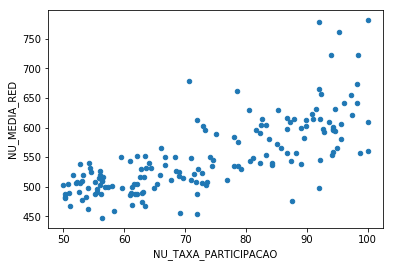

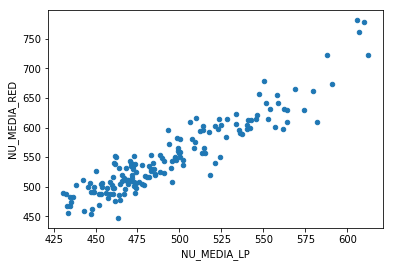

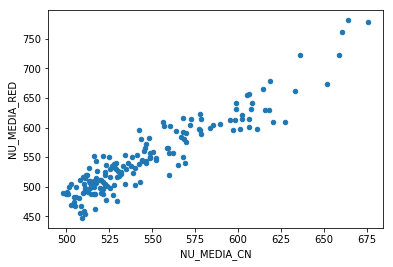

In [4]:
base.plot(kind='scatter',x='NU_TAXA_PARTICIPACAO',y='NU_MEDIA_RED')
base.plot(kind='scatter',x='NU_MEDIA_LP',y='NU_MEDIA_RED')
base.plot(kind='scatter',x='NU_MEDIA_CN',y='NU_MEDIA_RED')

#as 3 melhores correlações dessa base

## Regressões Lineares Simples###

0.5367774663151625
b = [329.64563997   3.00545982]


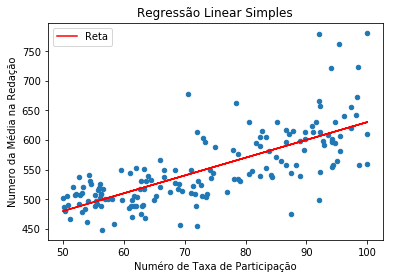

In [5]:
#X = Taxa de Participação

x = base[(base.NU_TAXA_PARTICIPACAO).notnull()].NU_TAXA_PARTICIPACAO
y = base[(base.NU_MEDIA_RED).notnull()].NU_MEDIA_RED
b = regressaoLinear(x,y)
yp = resolveLin(b,x)
re = r2(y,yp)
print(re)
base.plot(kind='scatter',x='NU_TAXA_PARTICIPACAO',y='NU_MEDIA_RED')
print("b =",b)
plt.plot(x,resolveLin(b,x),'r',label="Reta")
plt.title("Regressão Linear Simples")
plt.legend()
plt.xlabel("Numéro de Taxa de Participação")
plt.ylabel("Numero da Média na Redação")
plt.show()

0.8620243899966329
b = [-138.95528068    1.39461012]


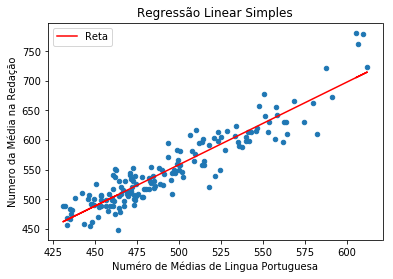

In [6]:
#X = Media em lingua portuguesa
x = base[(base.NU_MEDIA_LP).notnull()].NU_MEDIA_LP
y = base[(base.NU_MEDIA_RED).notnull()].NU_MEDIA_RED
b = regressaoLinear(x,y)
yp = resolveLin(b,x)
re = r2(y,yp)
print(re)
base.plot(kind='scatter',x='NU_MEDIA_LP',y='NU_MEDIA_RED')
print("b =",b)
plt.plot(x,resolveLin(b,x),'r',label="Reta")
plt.title("Regressão Linear Simples")
plt.legend()
plt.xlabel("Numéro de Médias de Lingua Portuguesa")
plt.ylabel("Numero da Média na Redação")
plt.show()

0.8719624221298531
b = [-260.59753074    1.4808434 ]


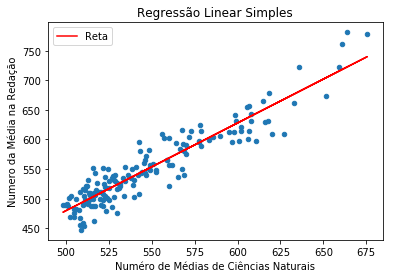

In [7]:

#X = Media em lingua ciencias naturais
x = base[(base.NU_MEDIA_CN).notnull()].NU_MEDIA_CN
y = base[(base.NU_MEDIA_RED).notnull()].NU_MEDIA_RED
b = regressaoLinear(x,y)
yp = resolveLin(b,x)
re = r2(y,yp)
print(re)
base.plot(kind='scatter',x='NU_MEDIA_CN',y='NU_MEDIA_RED')
print("b =",b)
plt.plot(x,resolveLin(b,x),'r',label="Reta")
plt.title("Regressão Linear Simples")
plt.legend()
plt.xlabel("Numéro de Médias de Ciências Naturais")
plt.ylabel("Numero da Média na Redação")
plt.show()

## Regressões Lineares Multiplas ###

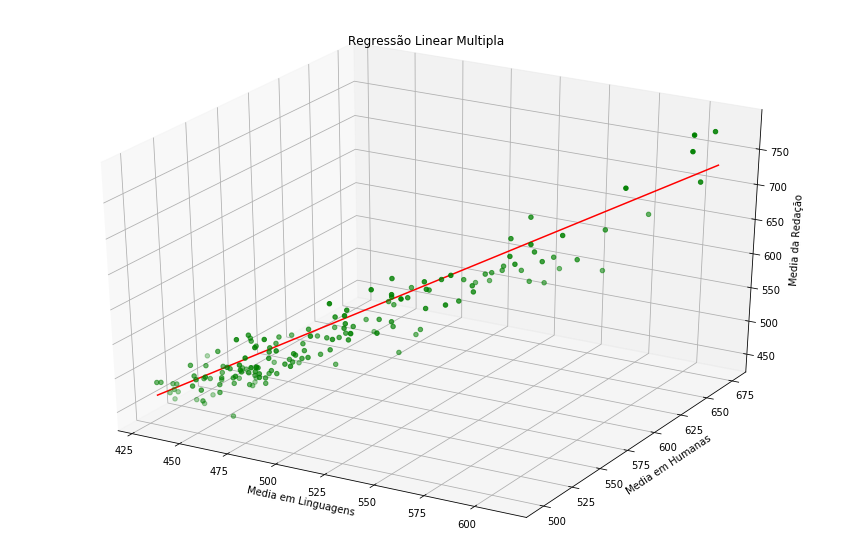

In [14]:
#X = MEDIA EM LINGUAGENS; Y = MEDIA EM HUMANAS
x = base[(base.NU_MEDIA_LP).notnull()].NU_MEDIA_LP
y = base[(base.NU_MEDIA_CN).notnull()].NU_MEDIA_CN
z = base[(base.NU_MEDIA_RED).notnull()].NU_MEDIA_RED
xs = np.array([x,y])
b = regressaoLinearMultipla(xs,z)
#Pontos e Base em 3D
fig = plt.figure()
plt.rcParams['figure.figsize'] = (15,10)
ax = fig.add_subplot(111, projection='3d')
ax.set_title("Regressão Linear Multipla")
ax.scatter(x, y, z, c='g', marker='o')
ax.set_xlabel('Media em Linguagens')
ax.set_ylabel('Media em Humanas')
ax.set_zlabel('Media da Redação')

#Linha em 3D
xpred = np.linspace(x.min(),x.max(),100)
ypred = np.linspace(y.min(),y.max(),100)
xmulti = np.array([xpred,ypred]).T
ax.plot(xpred,ypred,resolveLinVet(b,xmulti),c='r')
plt.show()

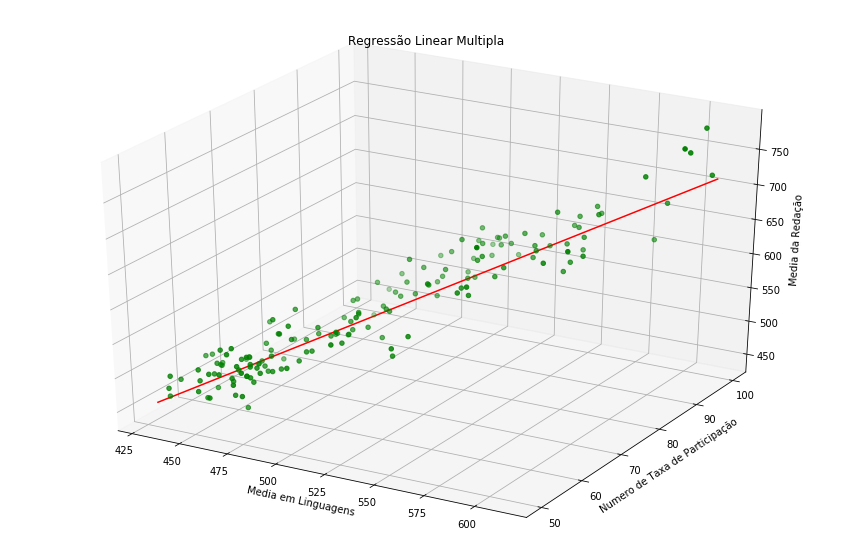

In [9]:
#X = MEDIA EM LINGUAGENS
; Y = TAXA DE PARTICIPAÇÃO
x = base[(base.NU_MEDIA_LP).notnull()].NU_MEDIA_LP
y = base[(base.NU_TAXA_PARTICIPACAO).notnull()].NU_TAXA_PARTICIPACAO
z = base[(base.NU_MEDIA_RED).notnull()].NU_MEDIA_RED
xs = np.array([x,y])
b = regressaoLinearMultipla(xs,z)
#Pontos e Base em 3D
fig = plt.figure()
plt.rcParams['figure.figsize'] = (15,10)
ax = fig.add_subplot(111, projection='3d')
ax.set_title("Regressão Linear Multipla")
ax.scatter(x, y, z, c='g', marker='o')
ax.set_xlabel('Media em Linguagens')
ax.set_ylabel('Numero de Taxa de Participação')
ax.set_zlabel('Media da Redação')

#Linha em 3D
xpred = np.linspace(x.min(),x.max(),100)
ypred = np.linspace(y.min(),y.max(),100)
xmulti = np.array([xpred,ypred]).T
ax.plot(xpred,ypred,resolveLinVet(b,xmulti),c='r')
plt.show()

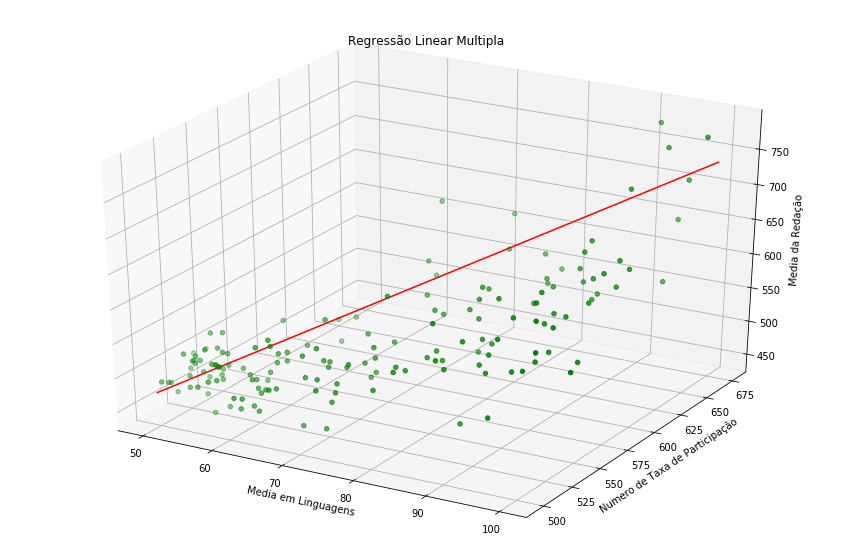

In [10]:
#X = TAXA DE PARTICIPAÇÃO; Y = MEDIA EM HUMANAS
x = base[(base.NU_TAXA_PARTICIPACAO).notnull()].NU_TAXA_PARTICIPACAO
y = base[(base.NU_MEDIA_CN).notnull()].NU_MEDIA_CN
z = base[(base.NU_MEDIA_RED).notnull()].NU_MEDIA_RED
xs = np.array([x,y])
b = regressaoLinearMultipla(xs,z)
#Pontos e Base em 3D
fig = plt.figure()
plt.rcParams['figure.figsize'] = (15,10)
ax = fig.add_subplot(111, projection='3d')
ax.set_title("Regressão Linear Multipla")
ax.scatter(x, y, z, c='g', marker='o')
ax.set_xlabel('Media em Linguagens')
ax.set_ylabel('Numero de Taxa de Participação')
ax.set_zlabel('Media da Redação')

#Linha em 3D
xpred = np.linspace(x.min(),x.max(),100)
ypred = np.linspace(y.min(),y.max(),100)
xmulti = np.array([xpred,ypred]).T
ax.plot(xpred,ypred,resolveLinVet(b,xmulti),c='r')
plt.show()

0.5526133375390281
b = [ 5.53658308e+02 -3.28224785e+00  4.22370764e-02]


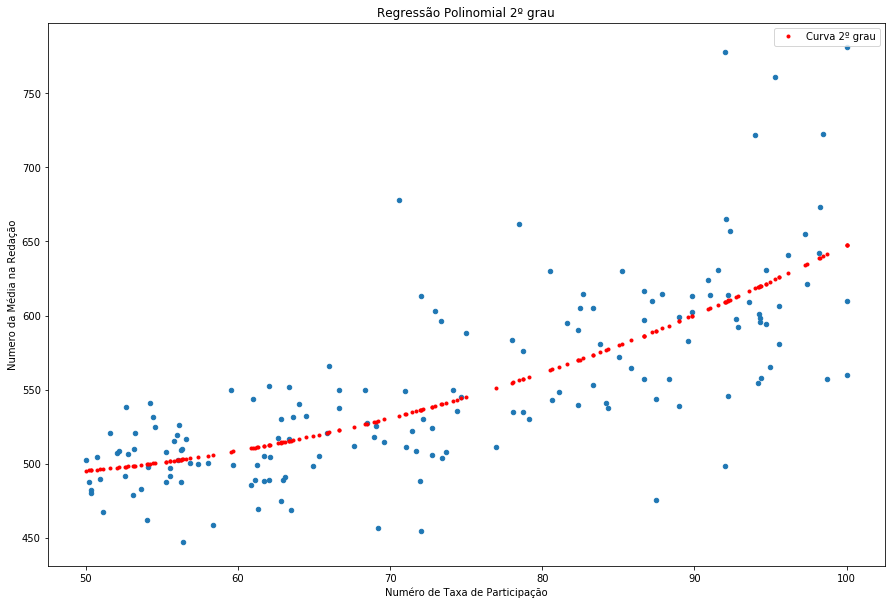

0.5526171222145835
b = [ 5.73074281e+02 -4.10393347e+00  5.35439654e-02 -5.06575977e-05]


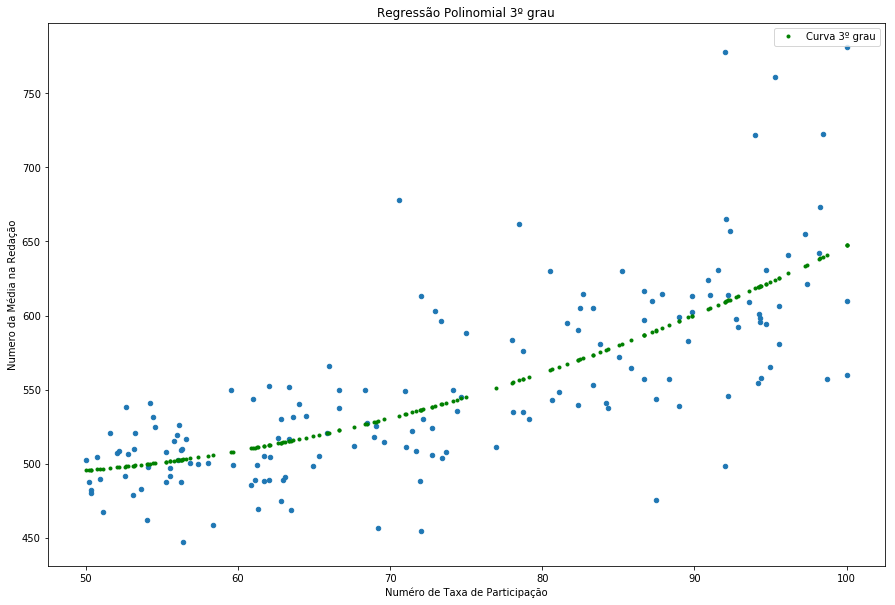

In [11]:
#X = Taxa de Participação
x = np.array(base[(base.NU_TAXA_PARTICIPACAO).notnull()].NU_TAXA_PARTICIPACAO)
y = base[(base.NU_MEDIA_RED).notnull()].NU_MEDIA_RED
b = regressaoPolinomial(x,y)
yp = resolvePol(b,x)
re = r2(y,yp)
print(re)
base.plot(kind='scatter',x='NU_TAXA_PARTICIPACAO',y='NU_MEDIA_RED')
print("b =",b)
plt.plot(x,resolvePol(b,x),'r.',label="Curva 2º grau")
plt.title("Regressão Polinomial 2º grau")
plt.legend()
plt.xlabel("Numéro de Taxa de Participação")
plt.ylabel("Numero da Média na Redação")
plt.show()

x = np.array(base[(base.NU_TAXA_PARTICIPACAO).notnull()].NU_TAXA_PARTICIPACAO)
y = base[(base.NU_MEDIA_RED).notnull()].NU_MEDIA_RED
b = regressaoPolinomial(x,y, g=3)
yp = resolvePol(b,x)
re = r2(y,yp)
print(re)
base.plot(kind='scatter',x='NU_TAXA_PARTICIPACAO',y='NU_MEDIA_RED')
print("b =",b)
plt.plot(x,resolvePol(b,x),'g.',label="Curva 3º grau")
plt.title("Regressão Polinomial 3º grau")
plt.legend()
plt.xlabel("Numéro de Taxa de Participação")
plt.ylabel("Numero da Média na Redação")
plt.show()


0.8714918055019925
b = [ 6.41739522e+02 -1.68449987e+00  3.01235116e-03]


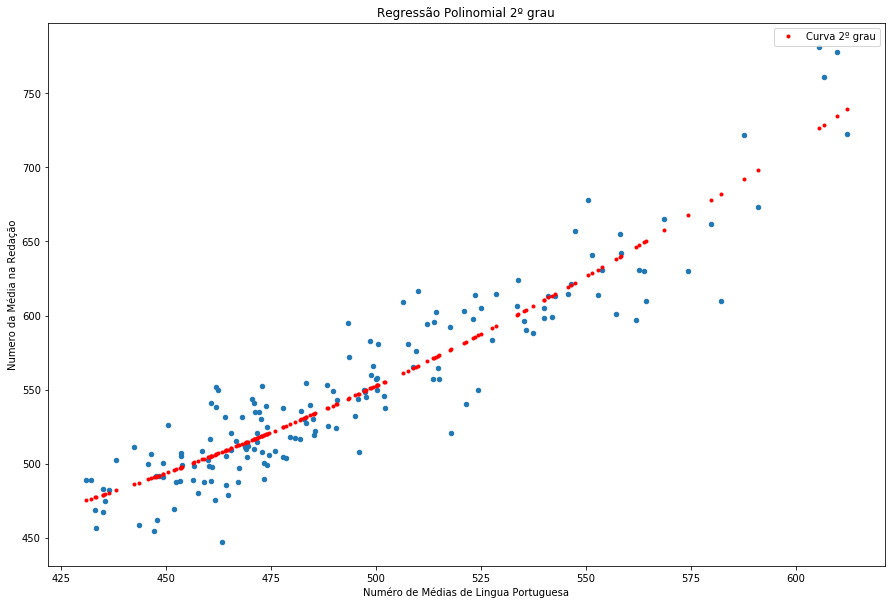

0.8739766662156014
b = [-3.41070102e+03  2.21191180e+01 -4.33394430e-02  2.99178845e-05]


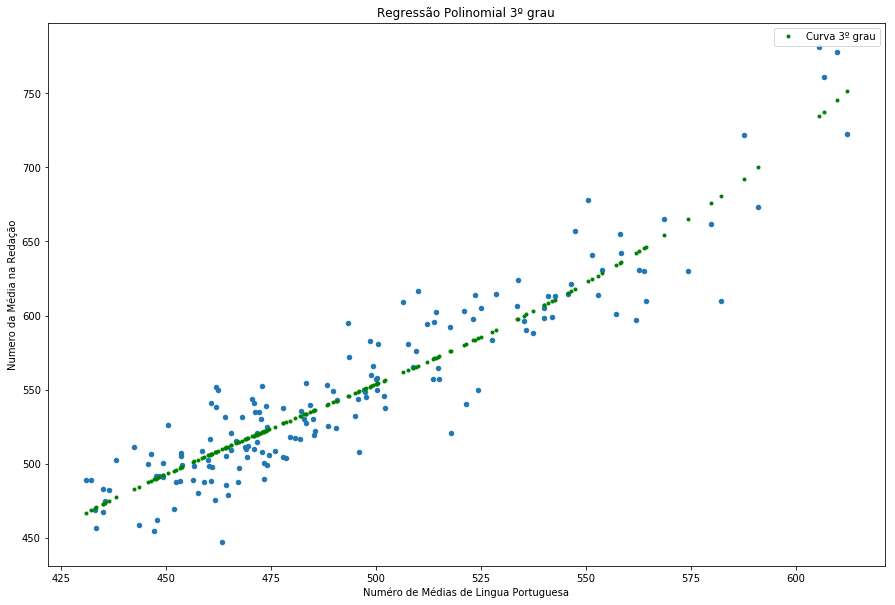

In [12]:
#X = Media em lingua portuguesa
x = np.array(base[(base.NU_MEDIA_LP).notnull()].NU_MEDIA_LP)
y = np.array(base[(base.NU_MEDIA_RED).notnull()].NU_MEDIA_RED)
b = regressaoPolinomial(x,y)
yp = resolvePol(b,x)
re = r2(y,yp)
print(re)
base.plot(kind='scatter',x='NU_MEDIA_LP',y='NU_MEDIA_RED')
print("b =",b)
plt.plot(x,resolvePol(b,x),'r.',label="Curva 2º grau")
plt.title("Regressão Polinomial 2º grau")
plt.legend()
plt.xlabel("Numéro de Médias de Lingua Portuguesa")
plt.ylabel("Numero da Média na Redação")
plt.show()

x = np.array(base[(base.NU_MEDIA_LP).notnull()].NU_MEDIA_LP)
y = np.array(base[(base.NU_MEDIA_RED).notnull()].NU_MEDIA_RED)
b = regressaoPolinomial(x,y, g=3)
yp = resolvePol(b,x)
re = r2(y,yp)
print(re)
base.plot(kind='scatter',x='NU_MEDIA_LP',y='NU_MEDIA_RED')
print("b =",b)
plt.plot(x,resolvePol(b,x),'g.',label="Curva 3º grau")
plt.title("Regressão Polinomial 3º grau")
plt.legend()
plt.xlabel("Numéro de Médias de Lingua Portuguesa")
plt.ylabel("Numero da Média na Redação")
plt.show()

0.8738161644628802
b = [ 2.18676172e+02 -2.13673918e-01  1.48833732e-03]


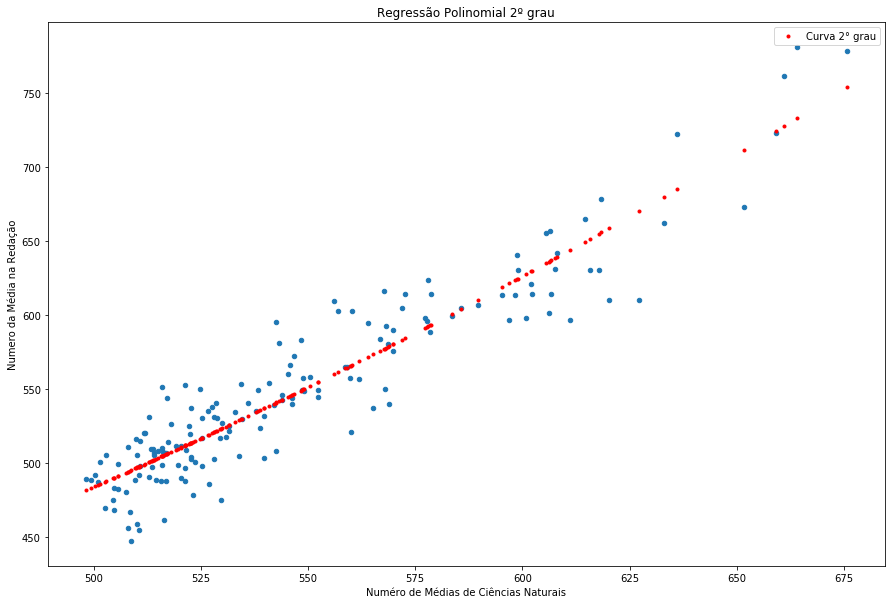

0.880561026096854
b = [-1.10910007e+04  5.89725971e+01 -1.01314832e-01  5.92605732e-05]


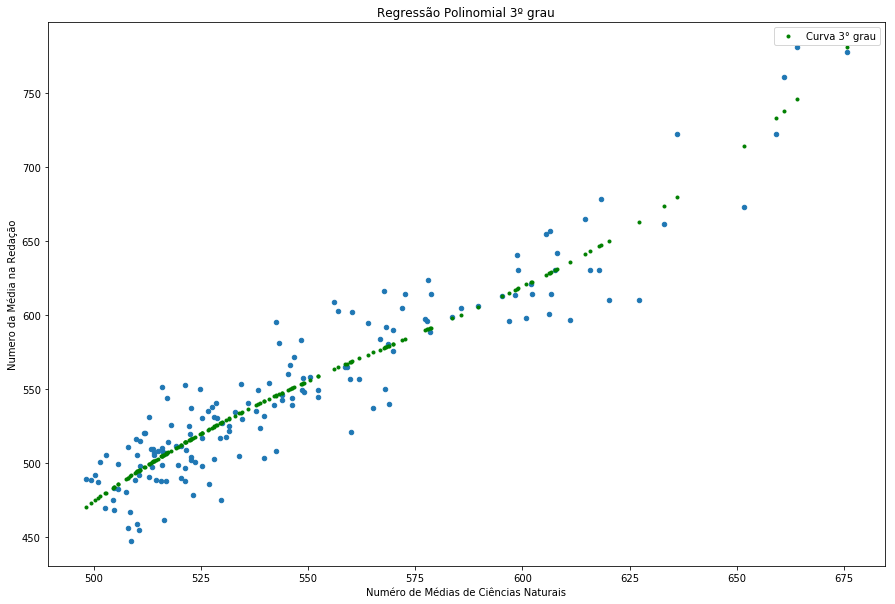

In [13]:

#X = Media em lingua ciencias naturais
x = np.array(base[(base.NU_MEDIA_CN).notnull()].NU_MEDIA_CN)
y = np.array(base[(base.NU_MEDIA_RED).notnull()].NU_MEDIA_RED)
b = regressaoPolinomial(x,y)
yp = resolvePol(b,x)
re = r2(y,yp)
print(re)
base.plot(kind='scatter',x='NU_MEDIA_CN',y='NU_MEDIA_RED')
print("b =",b)
plt.plot(x,resolvePol(b,x),'r.',label="Curva 2° grau")
plt.title("Regressão Polinomial 2º grau")
plt.legend()
plt.xlabel("Numéro de Médias de Ciências Naturais")
plt.ylabel("Numero da Média na Redação")
plt.show()

x = np.array(base[(base.NU_MEDIA_CN).notnull()].NU_MEDIA_CN)
y = np.array(base[(base.NU_MEDIA_RED).notnull()].NU_MEDIA_RED)
b = regressaoPolinomial(x,y,g=3)
yp = resolvePol(b,x)
re = r2(y,yp)
print(re)
base.plot(kind='scatter',x='NU_MEDIA_CN',y='NU_MEDIA_RED')
print("b =",b)
plt.plot(x,resolvePol(b,x),'g.',label="Curva 3° grau")
plt.title("Regressão Polinomial 3º grau")
plt.legend()
plt.xlabel("Numéro de Médias de Ciências Naturais")
plt.ylabel("Numero da Média na Redação")
plt.show()